# ***Breast Cancer Detection***

---

The problem addressed in this notebook is the detection of breast cancer using machine learning. Breast cancer can be classified into two types: malignant (cancerous) and benign (non-cancerous). Early and accurate detection is crucial for effective treatment and improved patient outcomes.

The notebook utilizes a dataset containing features extracted from breast mass images. The goal is to build a machine learning model that can accurately classify tumors as malignant or benign based on these features.

The notebook explores various approaches for this task, including data preprocessing, exploratory data analysis, feature selection, and model building. Different machine learning algorithms, such as Logistic Regression and Random Forest, are trained and evaluated. Techniques like cross-validation and randomized search are employed to optimize model performance and identify the best hyperparameters.

dataset source:https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

# **Part 01: Data Preprocessing**

================================================================================================================

## importing libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data.csv')
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
468,9113538,M,17.60,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,...,28.87,143.60,1437.0,0.1207,0.47850,0.51650,0.19960,0.2301,0.12240,NaN
228,88147202,B,12.62,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,...,31.31,90.67,624.0,0.1227,0.34540,0.39110,0.11800,0.2826,0.09585,NaN
404,904969,B,12.34,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.02054,...,16.85,84.11,533.1,0.1048,0.06744,0.04921,0.04793,0.2298,0.05974,NaN


## Data exploration

In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# To check summary of the data

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [ ]:
df.select_dtypes(include='number').columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
len(df.select_dtypes(include='number').columns)

32

## Dealing with missing values

In [ ]:
# df.isnull().sum()

In [ ]:
df.isna().sum().sum()

569

In [ ]:
df.columns[df.isna().any()]

Index(['Unnamed: 32'], dtype='object')

In [ ]:
df['Unnamed: 32'].isna().sum()

569

In [ ]:
df['Unnamed: 32'].count()

0

In [ ]:
df.drop(columns='Unnamed: 32', inplace=True)

In [ ]:
df.isna().values.any()

False

## Dealing with categorical data

In [ ]:
df.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
# One Hot Encoding

diagnosis = pd.get_dummies(data = df['diagnosis'], prefix='diagnosis', drop_first=True)
df.drop(columns='diagnosis', inplace=True)
df = pd.concat([df, diagnosis], axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [ ]:
df['diagnosis_M'] = df['diagnosis_M'].map({True:1, False:0})
df['diagnosis_M'].sample(5)

,diagnosis_M
228,0
178,0
96,0
394,0
499,1


In [ ]:
df['diagnosis_M'].value_counts()

,count
diagnosis_M,
0,357
1,212


## Countplot

<ipython-input-88-1ed712746dea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis_M', data=df, palette='Set2')


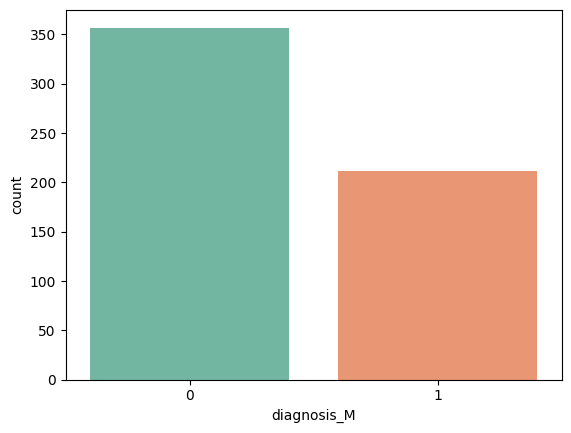

In [ ]:
sns.countplot(x='diagnosis_M', data=df, palette='Set2')
plt.show()

## Corelation Matrix and Heatmap

In [ ]:
df2 = df.drop(columns='diagnosis_M')
df2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


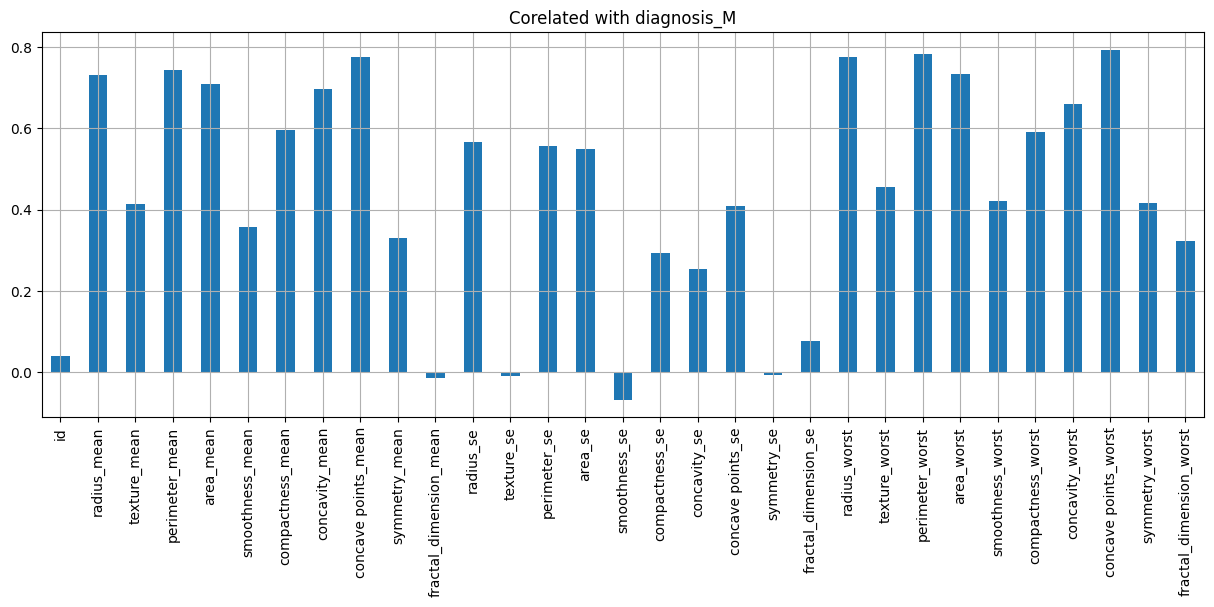

In [ ]:
plt.figure(figsize=(15,5))
df2.corrwith(df['diagnosis_M']).plot(kind='bar', title="Corelated with diagnosis_M", grid=True)
plt.show()

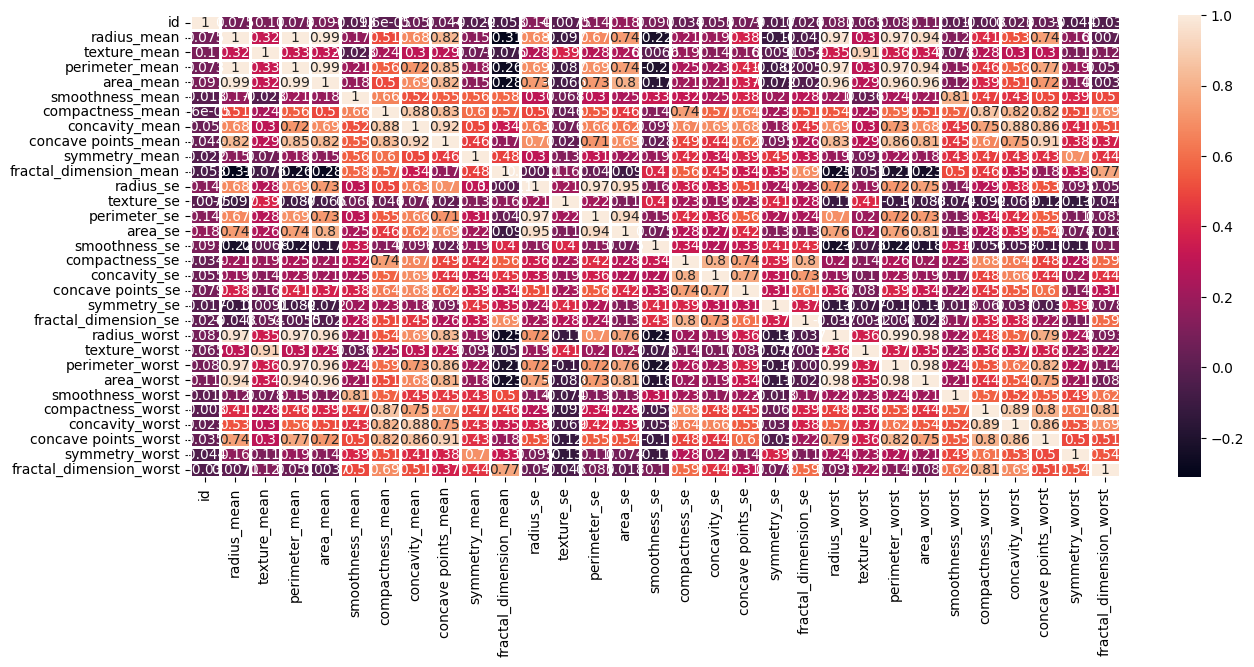

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df2.corr(), annot=True, linewidths=1, linecolor='white')
plt.show()

## Splitting the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diagnosis_M', 'id'])
y = df['diagnosis_M']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Part 02 : Model Building**
==============================================================================================

## 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier_lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
results = pd.DataFrame(
    [['Logistic regression', accuracy, precision, recall, f1]],
    columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score']
    )

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic regression,0.973684,0.97619,0.953488,0.964706


In [ ]:
confusion_matrix(y_test, y_pred)

array([[70,  1],
       [ 2, 41]])

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=10)
print(f"Accuracy is : {round(accuracies.mean()*100, ndigits=2)}%")
print(f"Standard Deviation is : {round(accuracies.std()*100, ndigits=2)}%")

Accuracy is : 97.36%
Standard Deviation is : 1.93%


## 2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[70,  1],
       [ 3, 40]])

In [ ]:
model_results = pd.DataFrame(
    [['Random Forest', accuracy, precision, recall, f1]],
    columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score']
    )

# Use pd.concat to combine DataFrames
results = pd.concat([results, model_results], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic regression,0.973684,0.97619,0.953488,0.964706
1,Random Forest,0.964912,0.97561,0.930233,0.952381


### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_rf, X=X_train, y=y_train, cv=10)
print(f"Accuracy is : {round(accuracies.mean()*100, ndigits=2)}%")
print(f"Standard Deviation is : {round(accuracies.std()*100, ndigits=2)}%")

Accuracy is : 96.26%
Standard Deviation is : 2.41%


**we have seen above Losistic regression performed slightly better than Random forest so we are going to select Logisitic regression as our model.**

# **part 03 : Randomized Search to find the best hyper parameters (Logistic Regression)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
    'C': [0.25, 0.75, 0.1, 1.25, 1.5, 1.75, 2.0],     # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga', 'sag'],  # Different solvers
    'max_iter': [100, 200, 300],                      # Number of iterations
    'penalty': ['l2']                                 # Regularization penalty
    }

In [ ]:
parameters

{'C': [0.25, 0.75, 0.1, 1.25, 1.5, 1.75, 2.0],
 'solver': ['lbfgs', 'liblinear', 'saga', 'sag'],
 'max_iter': [100, 200, 300],
 'penalty': ['l2']}

In [ ]:
random_search = RandomizedSearchCV(estimator=classifier_lr,
                                   param_distributions=parameters,
                                   n_iter=10, cv=10, n_jobs=-1,
                                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.25, 0.75, 0.1, 1.25, 1.5, 1.75,
                                              2.0],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear', 'saga',
                                                   'sag']},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

LogisticRegression(C=0.1, max_iter=200, solver='sag')

In [ ]:
random_search.best_params_

{'solver': 'sag', 'penalty': 'l2', 'max_iter': 200, 'C': 0.1}

In [ ]:
random_search.best_score_

0.9934366850188351

# **Part 04: Finalize Logistic Regression**

In [ ]:
classifier = LogisticRegression(solver= 'saga', penalty='l2',
                                max_iter= 300, C= 0.1)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=300, solver='saga')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
model_results = pd.DataFrame(
    [['Final Logistic Regression', accuracy, precision, recall, f1]],
    columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score']
    )

# Use pd.concat to combine DataFrames
results = pd.concat([results, model_results], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic regression,0.973684,0.97619,0.953488,0.964706
1,Random Forest,0.964912,0.97561,0.930233,0.952381
2,Final Logistic Regression,0.964912,0.97561,0.930233,0.952381


**Accuracy has been decreased after paramteres tunning let's verify it with cross validation**

### Cross validation

In [ ]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print(f"Accuracy is : {round(accuracies.mean()*100, ndigits=2)}%")
print(f"Standard Deviation is : {round(accuracies.std()*100, ndigits=2)}%")

Accuracy is : 97.36%
Standard Deviation is : 2.39%


# **part 05: Predicting a single observation**

In [ ]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df.iloc[0]

,0
id,842302.000000
radius_mean,17.990000
texture_mean,10.380000
perimeter_mean,122.800000
area_mean,1001.000000
smoothness_mean,0.118400
compactness_mean,0.277600
concavity_mean,0.300100
concave points_mean,0.147100
symmetry_mean,0.241900


In [ ]:
# We have removed id as we have droped this column in training data

single_observation = df.iloc[0].values[1:-1]
single_observation

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [ ]:
classifier.predict(sc.transform([single_observation]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

**Our model has predicted the correct label (1) which is malignant in this case**